Referencia a lo que sigue: [R for data science](https://r4ds.had.co.nz/)

# Visualización con [ggplot2](https://ggplot2.tidyverse.org/)

Un paquete de R que es versátil para la visualización bonita de datos es el de `ggplot2`. Tal paquete implementa *grammar of graphics* que es un sistema para describir y construir los componentes de una gráfica. Ver [The Grammar of Graphics](https://www.springer.com/gp/book/9780387245447) y [A Layered Grammar of Graphics](https://byrneslab.net/classes/biol607/readings/wickham_layered-grammar.pdf).

In [1]:
library(ggplot2) #cargamos el paquete con la función library

## Una opción para graficar es con la función [qplot](https://ggplot2.tidyverse.org/reference/qplot.html)

Y algunas funciones para crear datos de juguete son:

### *combine*: [c](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/c)

Con *combine* creamos un vector de sus argumentos que se almacena en x. Por ejemplo:


In [2]:
x <- c(1,2, 3) #vector con valores 1, 2, 4

In [3]:
print(x)

[1] 1 2 3


### Secuencia: [seq](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/seq)

Con `seq` creamos un vector cuyos valores forman una secuencia

In [4]:
y <- seq(1, 2, .5)

In [5]:
print(y)

[1] 1.0 1.5 2.0


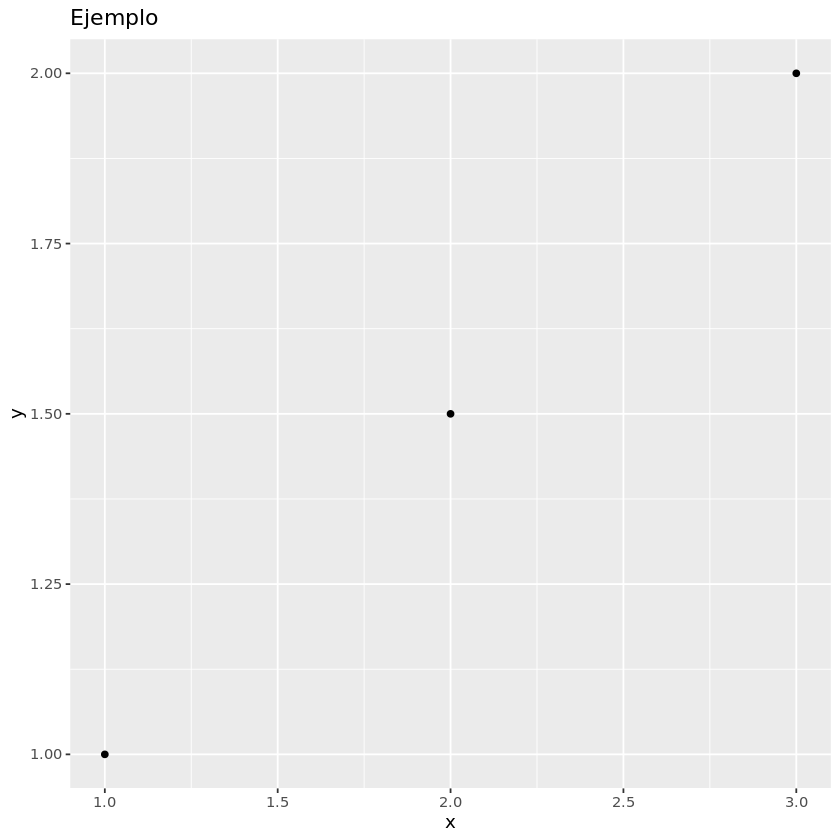

In [6]:
qplot(x = x, y = y, main = "Ejemplo") 

## Otra función para graficar más versátil es [ggplot](https://ggplot2.tidyverse.org/reference/ggplot.html)

Con la función `ggplot` creamos un sistema de coordenadas al que le podemos colocar capas o *layers*. 

In [7]:
coordinate_system <- ggplot()

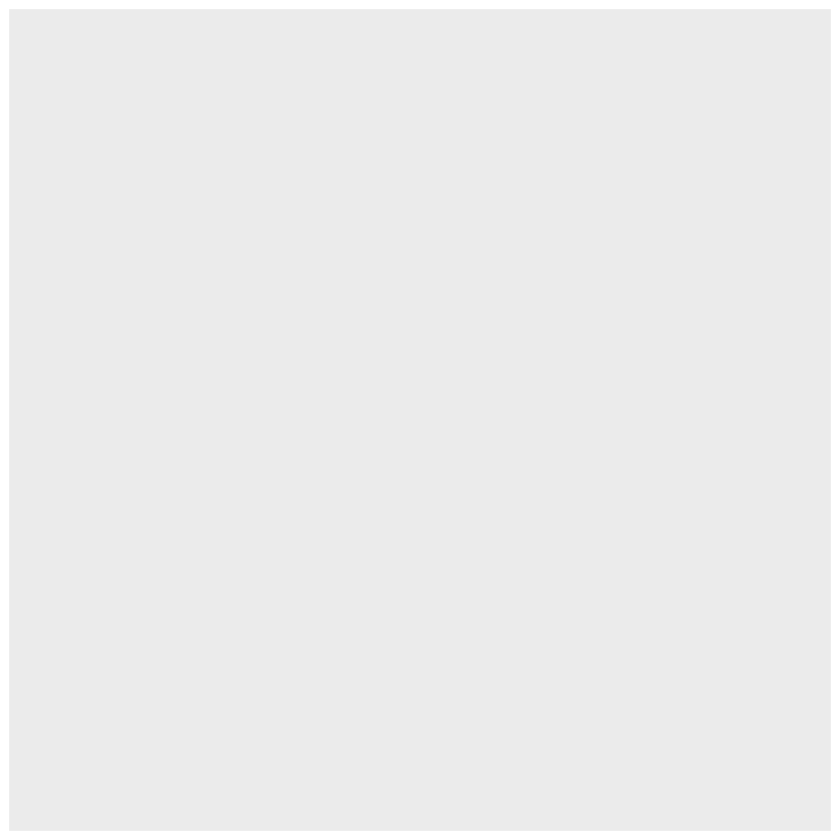

In [8]:
coordinate_system

Y para hacer una gráfica colocaremos los datos anteriores en un *data frame* el cual es una colección rectangular de variables en las columnas y observaciones en los renglones, por ejemplo:

| Variable1 | Variable 2|
|:---:|:---:|
|4| 7.5|
|-5.1|8|

En R podemos crear un *data frame* con la función [data.frame](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/data.frame)

Datos:

In [9]:
print(x)

[1] 1 2 3


In [10]:
print(y)

[1] 1.0 1.5 2.0


In [11]:
df <- data.frame(variable1 = x, variable2 = y) 

In [12]:
print(df)

  variable1 variable2
1         1       1.0
2         2       1.5
3         3       2.0


El paquete `ggplot2` tiene funciones que añaden capas de diferentes tipo a una gráfica. Tales funciones tienen un argumento de nombre *mapping* que define cómo se mapean las variables a propiedades de la gráfica. Este argumento siempre se le acompaña de la función [aes](https://ggplot2.tidyverse.org/reference/aes.html) que utiliza argumentos de nombre `x` y `y` para las variables que estarán en el eje horizontal y el eje vertical respectivamente.

Un ejemplo es [geom_point](https://ggplot2.tidyverse.org/reference/geom_point.html) que crea un *scatterplot*:

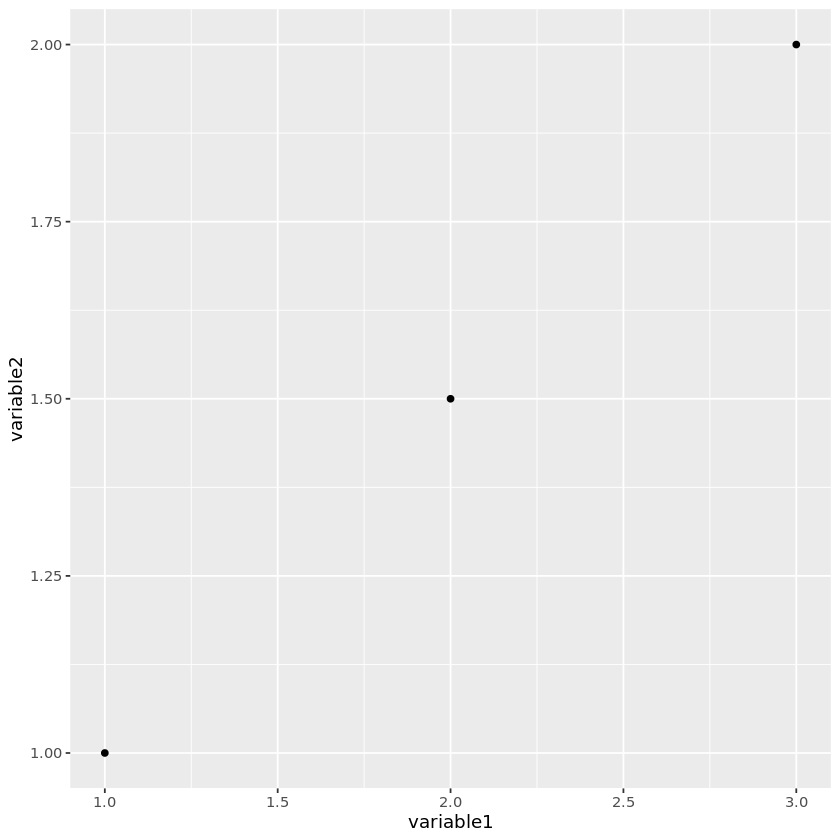

In [13]:
coordinate_system + geom_point(df, mapping = aes(x = variable1, y = variable2))

Otra forma que podemos usar es pasar como argumento el *data frame* en la función de `ggplot`:

In [14]:
coordinate_system2 <- ggplot(data = df)

Y ya no pasamos el *data frame* en la función `geom_point`:

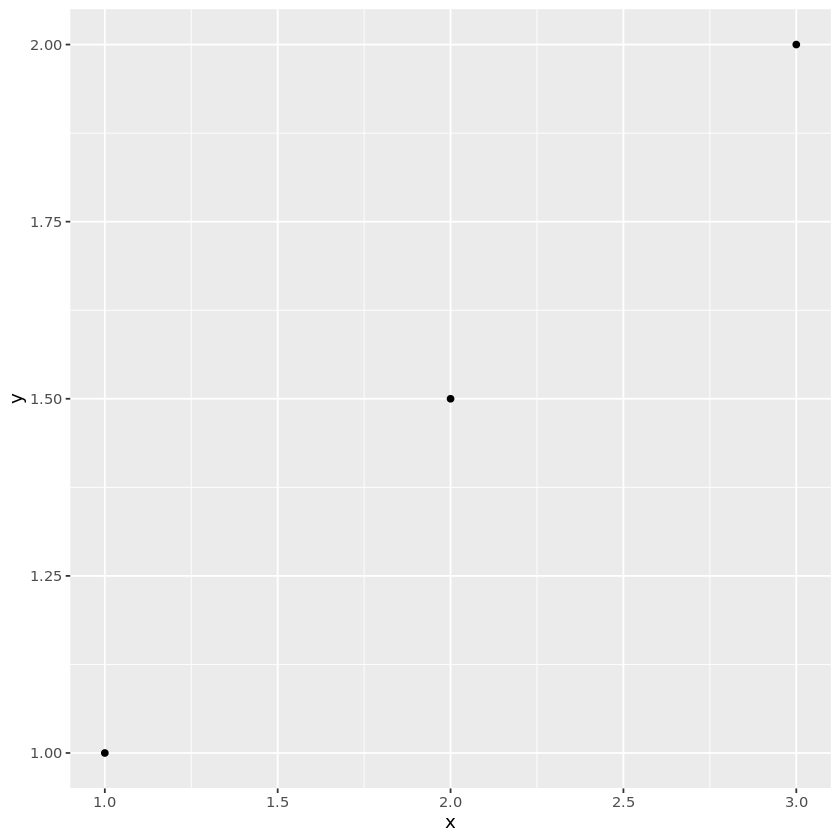

In [15]:
coordinate_system2 + geom_point(aes(x = x, y = y))

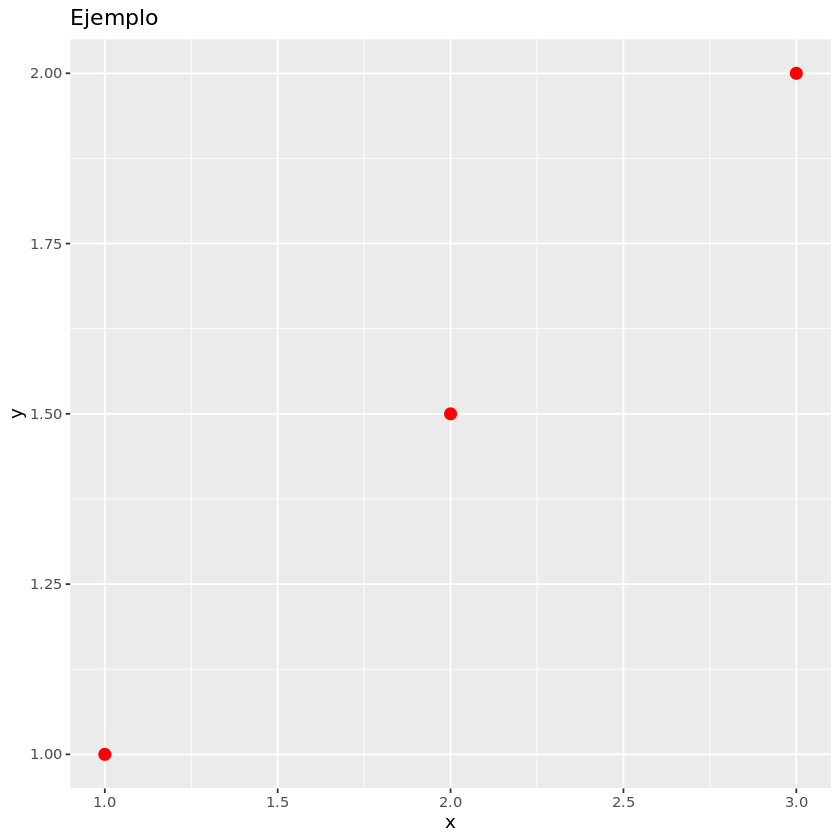

In [22]:
coordinate_system2 + geom_point(aes(x = x, y = y), 
                                size = 3,
                                color = "red") +
                     ggtitle('Ejemplo')

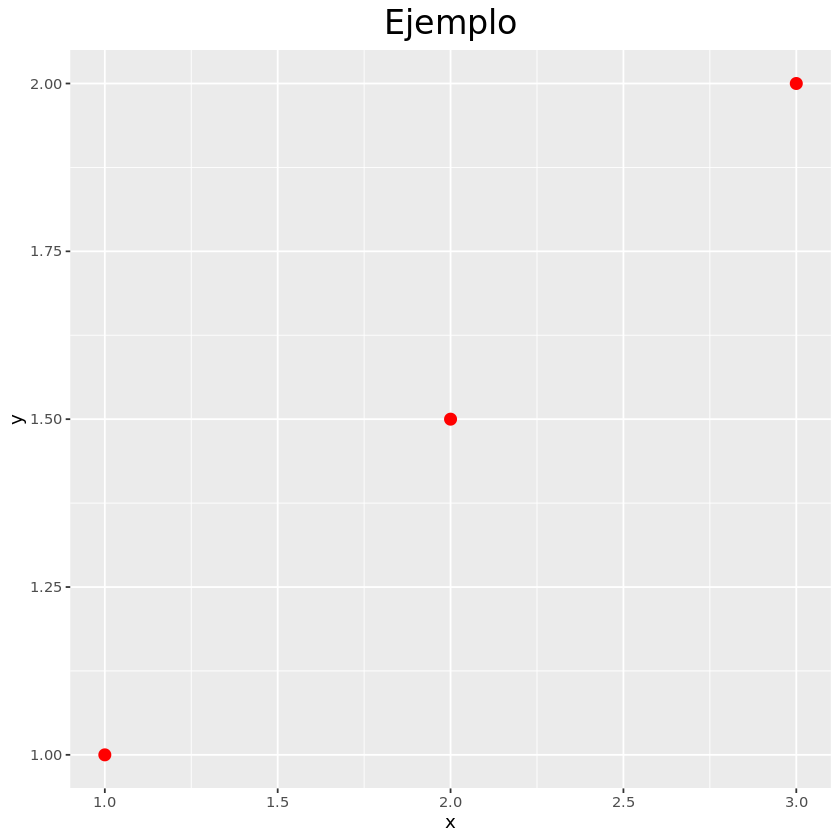

In [24]:
coordinate_system2 + geom_point(aes(x = x, y = y), 
                                size = 3,
                                color = "red") +
                     ggtitle('Ejemplo') +
                     theme(plot.title = element_text(size=20, hjust = 0.5))